In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import numpy as np

DATA_FILE='../samples/csv/iris.csv'
def pd_load(path=DATA_FILE):
    df = pd.read_csv(path,sep=',',header=0).rename({'Unnamed: 0':'column'},axis=1)
    #df.to_csv('/Users/hagi/downloads/color_data.csv/color_data2.csv', index=False)
    return df

def cv_save(path):
    imgs = [cv2.imread(os.path.join(path, im)) for im in os.listdir(path) if im!=".DS_Store"]
    imgs_ = np.hstack(np.array(imgs))
    cv2.imwrite(os.path.join(path, 'result.png'), imgs_)
    

df = pd_load(path=DATA_FILE)
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


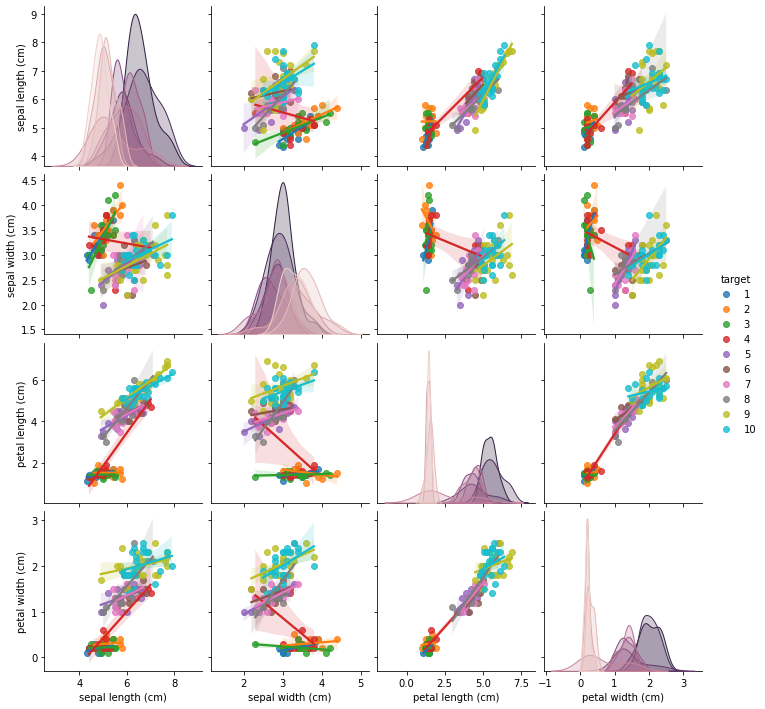

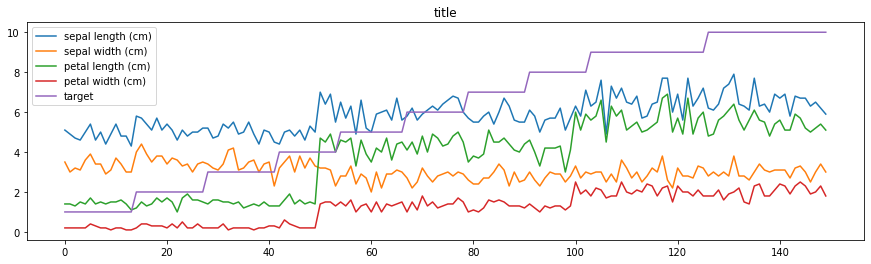

In [4]:
def scatter_plot(target_name):
    # 散布図行列の出力
    sns.pairplot(data=df, hue=target_name, diag_kind="kde", kind="reg")
    # 線グラフ
    df.plot(figsize=(15,4), title="title")
    plt.show()
    
scatter_plot(target_name='target')

<Figure size 432x288 with 0 Axes>

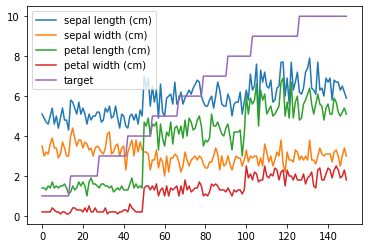

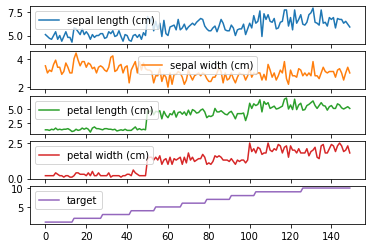

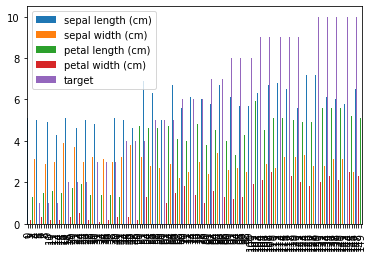

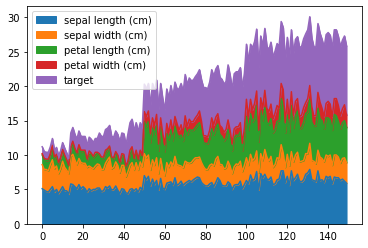

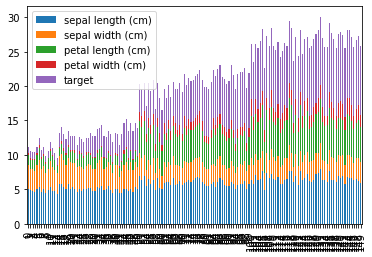

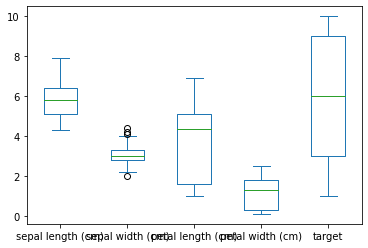

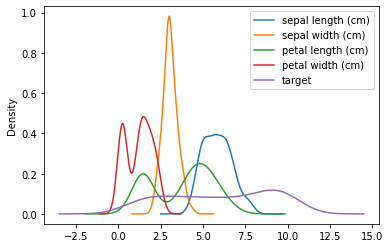

concat image and save


In [5]:
def pandas_save_as_img(df, save_path='results'):
    path = save_path
    os.makedirs(path, exist_ok=True)
    plt.figure()

    df.plot.line()
    df.plot.line(subplots=True) 
    plt.savefig(os.path.join(path, 'line.png'))
    df.plot.bar()
    plt.savefig(os.path.join(path, 'bar.png'))
    df.plot.area()
    plt.savefig(os.path.join(path, 'area.png'))
    df.plot.bar(stacked=True)
    plt.savefig(os.path.join(path, 'bar.png'))
    df.plot.box()
    plt.savefig(os.path.join(path, 'box.png'))
    df.plot.kde()
    plt.savefig(os.path.join(path, 'kde.png'))
    plt.show()
    plt.close('all')
    print('concat image and save')
    cv_save(path)
    
pandas_save_as_img(df)

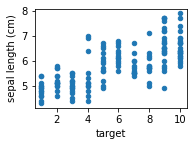

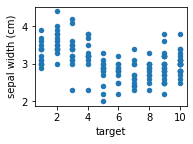

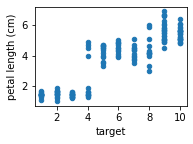

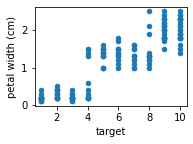

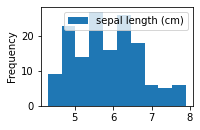

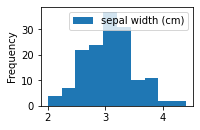

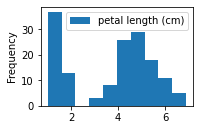

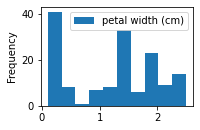

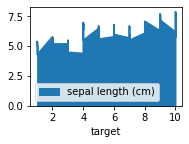

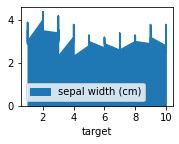

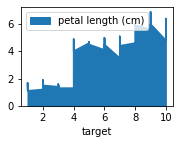

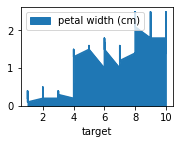

In [6]:
def pd_column_name(df):
    return df.columns.values

def plot_kinds(types):
    if types=='scatter':
        plot_types='scatter'
    elif types=='hexbin':
        plot_types='hexbin'
    elif types=='pie':
        plot_types='pie'
    elif types=='box':
        plot_types='box'
    elif types=='area':
        plot_types='area'
    else:
        plot_types='hist'
    return plot_types


def pandas_linear_plot(df, path, yname, types='scatter'):
    os.makedirs(os.path.join(path, types), exist_ok=True)
    df = df.copy() 
    plot_type = plot_kinds(types)  
    names = pd_column_name(df)
    xs = yname
    df.drop(str(xs), axis=1)
    for i, name in enumerate(names):
        if name==xs:
            continue
        df.plot(kind=plot_type, x=xs, y=name, subplots=True, layout=(2, 2))
        plt.savefig(os.path.join(path, types, 'kde{}.png'.format(i)))
    cv_save(os.path.join(path, types)) 
   
def each_cls_analysis(df, target_name):
    PATH= 'results'
    pandas_linear_plot(df, PATH, yname=target_name, types='scatter')
    pandas_linear_plot(df, PATH, yname=target_name, types='hist')
    pandas_linear_plot(df, PATH, yname=target_name, types='area')
    
each_cls_analysis(df, target_name='target')